# Pel·lícules de Netflix, Prime Video, Hulu i Disney+

1600123 | Alba Fernández Coronado

In [1]:
# Carregant les llibreries necessàries
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import collections as col
import scipy.stats as stats
import statsmodels.api as sm
import scipy.stats
import random as rand
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import LabelEncoder, StandardScaler, scale, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score, confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import warnings
import time
from yellowbrick.target import FeatureCorrelation
import statistics as st
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.datasets import make_regression

warnings.filterwarnings("ignore")

### EDA I PREPROCESSING

In [2]:
# Obrint el dataset
dataset = pd.read_csv('./MoviesOnStreamingPlatforms.csv')
print(f'Mida de les dades: {dataset.shape}')
dataset.info() # Entenent els tipus de variables de cada atribut
dataset.head()

Mida de les dades: (9515, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       9515 non-null   int64 
 1   ID               9515 non-null   int64 
 2   Title            9515 non-null   object
 3   Year             9515 non-null   int64 
 4   Age              5338 non-null   object
 5   Rotten Tomatoes  9508 non-null   object
 6   Netflix          9515 non-null   int64 
 7   Hulu             9515 non-null   int64 
 8   Prime Video      9515 non-null   int64 
 9   Disney+          9515 non-null   int64 
 10  Type             9515 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 817.8+ KB


,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0


In [3]:
#S'eliminen les columnes innecessàries del dataset
dataset_df = dataset.drop(["Unnamed: 0", "ID"], axis=1)
#Es mira la columna Type --> Type Movie: 0 TV Show: 1
print("Tipus de valors columna Type: ",dataset_df['Type'].nunique()) #quants tipus de valors hi ha: 1
print("Valors únics columna Type: ",dataset_df['Type'].unique()) #quins són els valors únics: 0
dataset_df = dataset_df.drop(["Type"], axis=1) #Eliminem la columna Type pq totes les pelis són Movies
dataset_df.head()

Tipus de valors columna Type:  1
Valors únics columna Type:  [0]


,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,The Irishman,2019,18+,98/100,1,0,0,0
1,Dangal,2016,7+,97/100,1,0,0,0
2,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0
3,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0
4,Roma,2018,18+,94/100,1,0,0,0


In [4]:
#Ara afegim una columna per mirar si les pelis tenen restricció d'edat o no
dataset_df['Age_Restricted'] = np.where(dataset_df['Age'].isna(), 0, 1)

#A més, per introduir el titol per la predicció del target, afegirem una columna amb la llargada del titol
dataset_df['Title_Length'] = dataset_df['Title'].str.len()

dataset_df.head()

,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Age_Restricted,Title_Length
0,The Irishman,2019,18+,98/100,1,0,0,0,1,12
1,Dangal,2016,7+,97/100,1,0,0,0,1,6
2,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,1,40
3,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,1,33
4,Roma,2018,18+,94/100,1,0,0,0,1,4


In [5]:
#Mirem el percentatge de valors Null
(dataset_df.isnull().sum()/len(dataset))*100

Title               0.000000
Year                0.000000
Age                43.899107
Rotten Tomatoes     0.073568
Netflix             0.000000
Hulu                0.000000
Prime Video         0.000000
Disney+             0.000000
Age_Restricted      0.000000
Title_Length        0.000000
dtype: float64

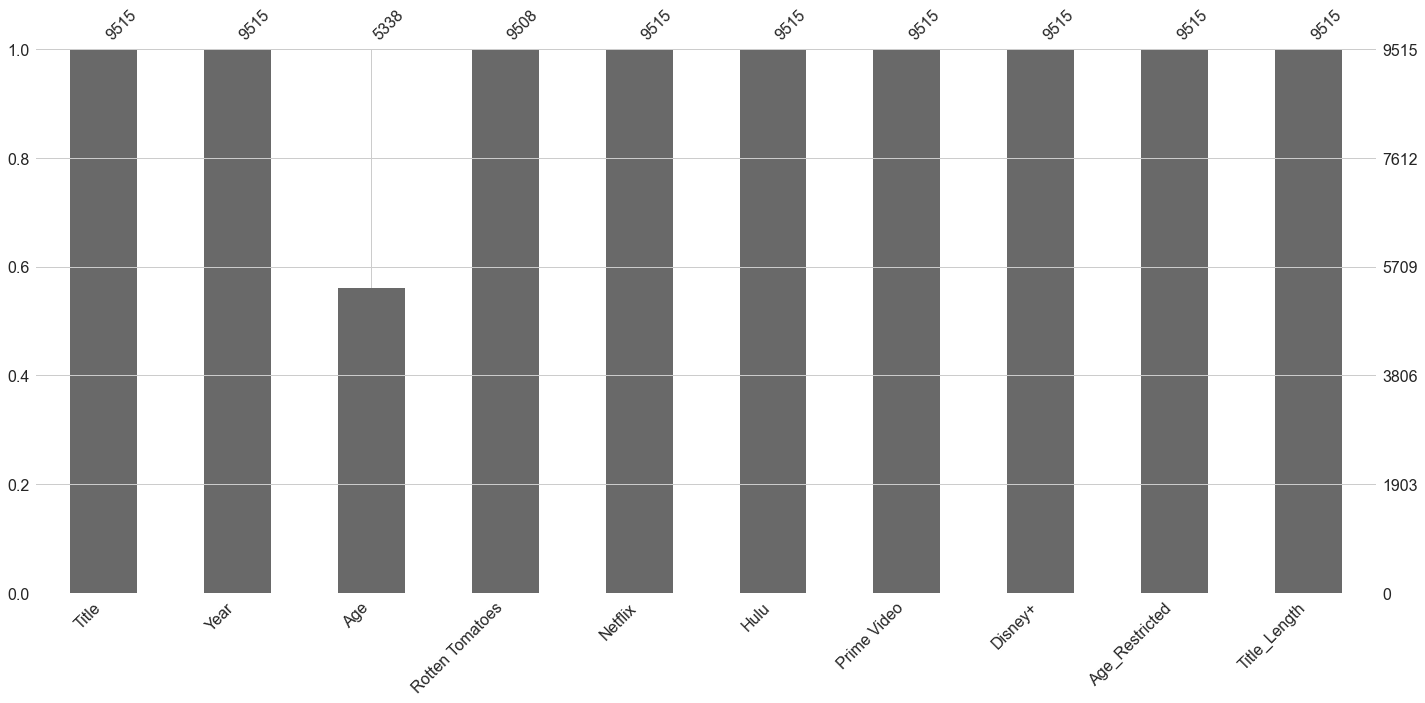

In [6]:
import missingno as msno
# plotting the number of rows with entries per column
msno.bar(dataset_df)

In [7]:
#Eliminem les files que continguin NaNs a la variable resposta (Rotten Tomatoes) pq no ens interessen
dataset_df = dataset_df[dataset_df['Rotten Tomatoes'].notna()]

(dataset_df.isnull().sum()/len(dataset_df))*100

Title               0.000000
Year                0.000000
Age                43.857804
Rotten Tomatoes     0.000000
Netflix             0.000000
Hulu                0.000000
Prime Video         0.000000
Disney+             0.000000
Age_Restricted      0.000000
Title_Length        0.000000
dtype: float64

In [8]:
#Tractem les dades tipus objecte
dataset_df['Rotten Tomatoes'] = (dataset_df['Rotten Tomatoes'].str.split("/", n=1).str[0].astype("int"))/100

#Tractem la columna Age
dataset_df['Age'].fillna(0, inplace=True) #omplim els nans amb 0
edats = {"18+": 18, "7+": 7, "13+": 13, "16+": 16, "all": 0, 0:0}
dataset_df['Age'] = [edats[item] for item in dataset_df['Age']]

dataset_df.info()
dataset_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9508 entries, 0 to 9514
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            9508 non-null   object 
 1   Year             9508 non-null   int64  
 2   Age              9508 non-null   int64  
 3   Rotten Tomatoes  9508 non-null   float64
 4   Netflix          9508 non-null   int64  
 5   Hulu             9508 non-null   int64  
 6   Prime Video      9508 non-null   int64  
 7   Disney+          9508 non-null   int64  
 8   Age_Restricted   9508 non-null   int32  
 9   Title_Length     9508 non-null   int64  
dtypes: float64(1), int32(1), int64(7), object(1)
memory usage: 780.0+ KB


,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Age_Restricted,Title_Length
0,The Irishman,2019,18,0.98,1,0,0,0,1,12
1,Dangal,2016,7,0.97,1,0,0,0,1,6
2,David Attenborough: A Life on Our Planet,2020,7,0.95,1,0,0,0,1,40
3,Lagaan: Once Upon a Time in India,2001,7,0.94,1,0,0,0,1,33
4,Roma,2018,18,0.94,1,0,0,0,1,4


### Anàlisi dels atributs

Text(0.5, 1.0, "Any d'estreno de les pel·lícules")

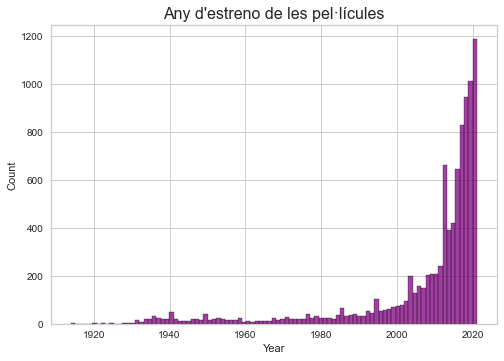

In [9]:
#Es grafiquen el nombre de pelis per any
sns.histplot(data=dataset_df, x="Year", color="purple")
plt.title("Any d'estreno de les pel·lícules", fontsize=16)

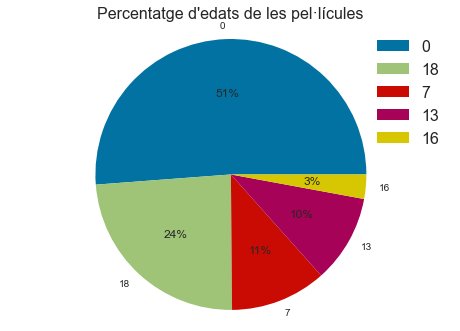

In [10]:
#Es grafiquen els percentatges d'edat
count_edats = [dataset_df['Age'].value_counts()]
noms_edats = ["0","18","7","13","16"]
plt.pie(count_edats, labels=noms_edats, autopct='%1.0f%%')
plt.axis("equal")
plt.title("Percentatge d'edats de les pel·lícules", fontsize=16)
plt.legend(loc='best', facecolor='w', fontsize=16)
plt.show()

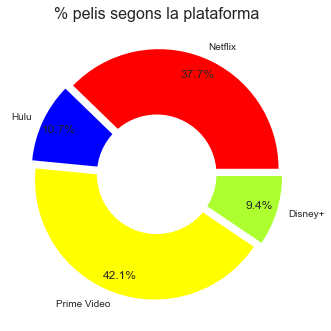

In [11]:
#Gràfic segons el percentatge de pelis que té cada plataforma
Plataformes = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
rows = len(dataset_df.axes[0])
nombre_pelis = [dataset_df['Netflix'].sum()/rows, dataset_df['Hulu'].sum()/rows, 
                dataset_df['Prime Video'].sum()/rows, dataset_df['Disney+'].sum()/rows]
colors = ['#FF0000', '#0000FF', '#FFFF00', '#ADFF2F']
explode = (0.05, 0.05, 0.05, 0.05)

# Pie Chart
plt.pie(nombre_pelis, colors=colors, labels=Plataformes,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('% pelis segons la plataforma', fontsize=16)
  
# Displaying Chart
plt.show()

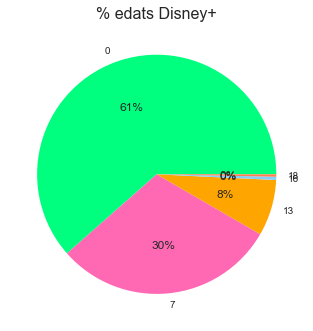

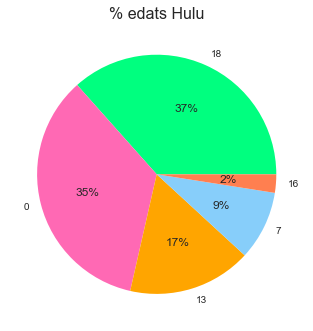

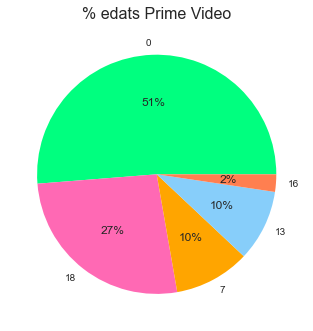

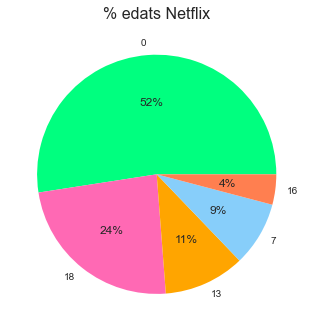

In [12]:
#Es grafiquen les edats segons les plataformes
#Disney+
dataset_Disney = dataset_df[dataset_df['Disney+'] ==1]
punt_disney = dataset_Disney['Rotten Tomatoes']
#Hulu
dataset_Hulu = dataset_df[dataset_df['Hulu'] ==1]
punt_hulu = dataset_Hulu['Rotten Tomatoes']
#Prime Video
dataset_Prime = dataset_df[dataset_df['Prime Video'] ==1]
punt_prime = dataset_Prime['Rotten Tomatoes']
#Netflix
dataset_Netflix = dataset_df[dataset_df['Netflix'] ==1]
punt_netflix = dataset_Netflix['Rotten Tomatoes']

mycolors = ["springgreen", "hotpink", "orange", "lightskyblue", "coral"]
plt.pie(dataset_Disney['Age'].value_counts(), labels = ["0","7","13","16","18"], colors= mycolors, autopct='%.0f%%')
plt.title("% edats Disney+", fontsize=16)
plt.show()
plt.pie(dataset_Hulu['Age'].value_counts(), labels = ["18","0","13","7","16"], colors= mycolors, autopct='%.0f%%')
plt.title("% edats Hulu", fontsize=16)
plt.show()
plt.pie(dataset_Prime['Age'].value_counts(), labels = ["0","18","7","13","16"], colors= mycolors, autopct='%.0f%%')
plt.title("% edats Prime Video", fontsize=16)
plt.show()
plt.pie(dataset_Netflix['Age'].value_counts(), labels = ["0","18","13","7","16"], colors= mycolors, autopct='%.0f%%')
plt.title("% edats Netflix", fontsize=16)
plt.show()

Dinsey+: 3.225596529284165 Hulu: 9.809933142311365 Prime Video: 7.118891320204231 Netflix 6.9707158351409975


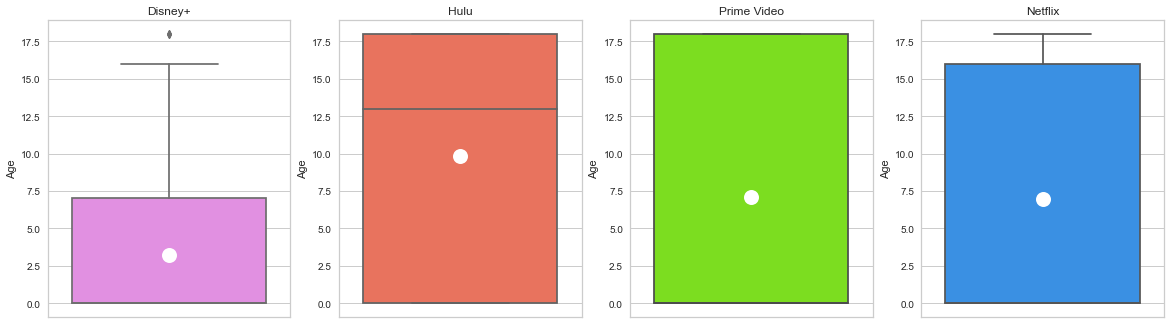

In [13]:
#Boxplot mitjana d'edat de cada plataforma

print("Dinsey+:", dataset_Disney['Age'].mean(), "Hulu:", dataset_Hulu['Age'].mean(),
     "Prime Video:", dataset_Prime['Age'].mean(), "Netflix", dataset_Netflix['Age'].mean())
#Fem els histogrames
fig = plt.figure(figsize=(20,12))
ax1 = fig.add_subplot(2, 4, 1) 
ax1.set_title('Disney+') 
ax2 = fig.add_subplot(2, 4, 2) 
ax2.set_title('Hulu')
ax3 = fig.add_subplot(2, 4, 3)
ax3.set_title('Prime Video')
ax4 = fig.add_subplot(2, 4, 4)
ax4.set_title('Netflix')
sns.boxplot(data=dataset_Disney, y="Age", color="violet",showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", "markersize":"15"}, ax=ax1)
sns.boxplot(data=dataset_Hulu, y="Age", color = "tomato", showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", "markersize":"15"}, ax=ax2)
sns.boxplot(data=dataset_Prime, y="Age", color="lawngreen", showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", "markersize":"15"}, ax=ax3)
sns.boxplot(data=dataset_Netflix, y="Age", color="dodgerblue", showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", "markersize":"15"}, ax=ax4)
plt.show()

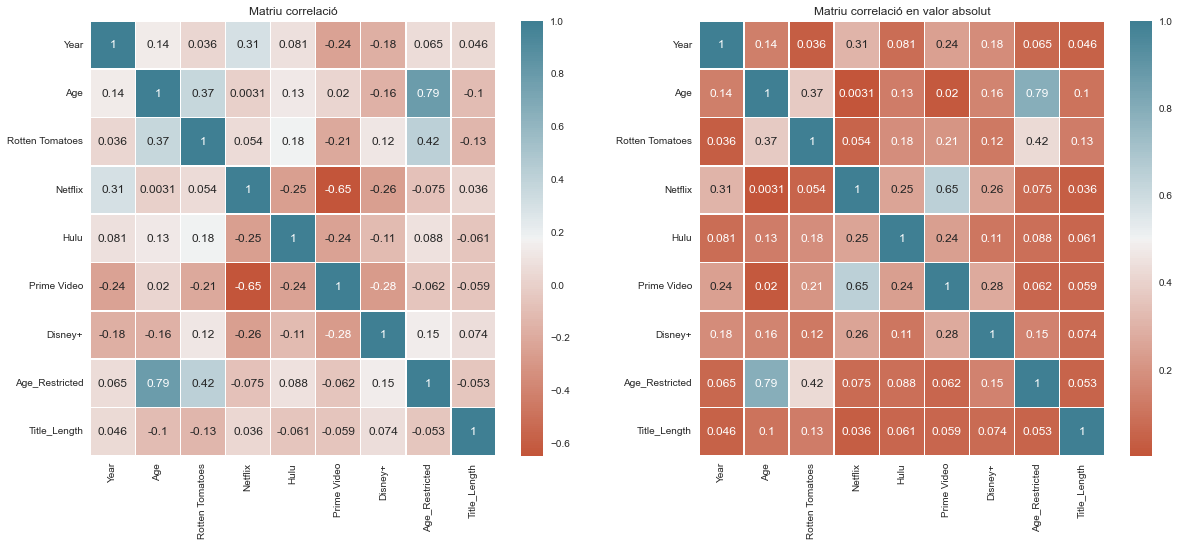

In [14]:
# Estudi de la correlació entre els atributs
correlacio = dataset_df.corr()

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(1, 2, 1) 
ax1.set_title('Matriu correlació') 
ax2 = fig.add_subplot(1, 2, 2) 
ax2.set_title('Matriu correlació en valor absolut')

sns.heatmap(correlacio, annot=True, linewidths=.5, cmap = sns.diverging_palette(20, 220, n=200), ax=ax1)
sns.heatmap(abs(correlacio), annot=True, linewidths=.5, cmap = sns.diverging_palette(20, 220, n=200), ax=ax2)
plt.show()

### Informació sobre la variable resposta

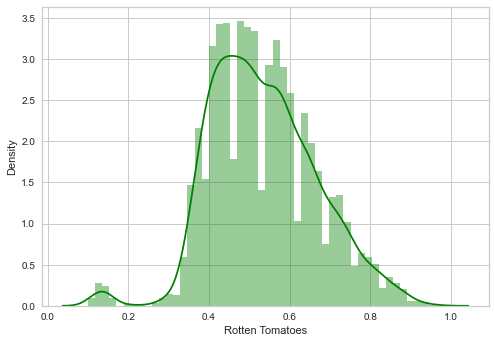

In [15]:
#Gràfic de la variable resposta
sns.distplot(dataset_df['Rotten Tomatoes'], color= 'green')

In [16]:
from scipy import stats
x = dataset_df['Rotten Tomatoes']
shapiro_test = stats.shapiro(x)
shapiro_test

#Es pot considerar una normal pq p-valor< 0.05

ShapiroResult(statistic=0.9817572236061096, pvalue=3.755901346180971e-33)

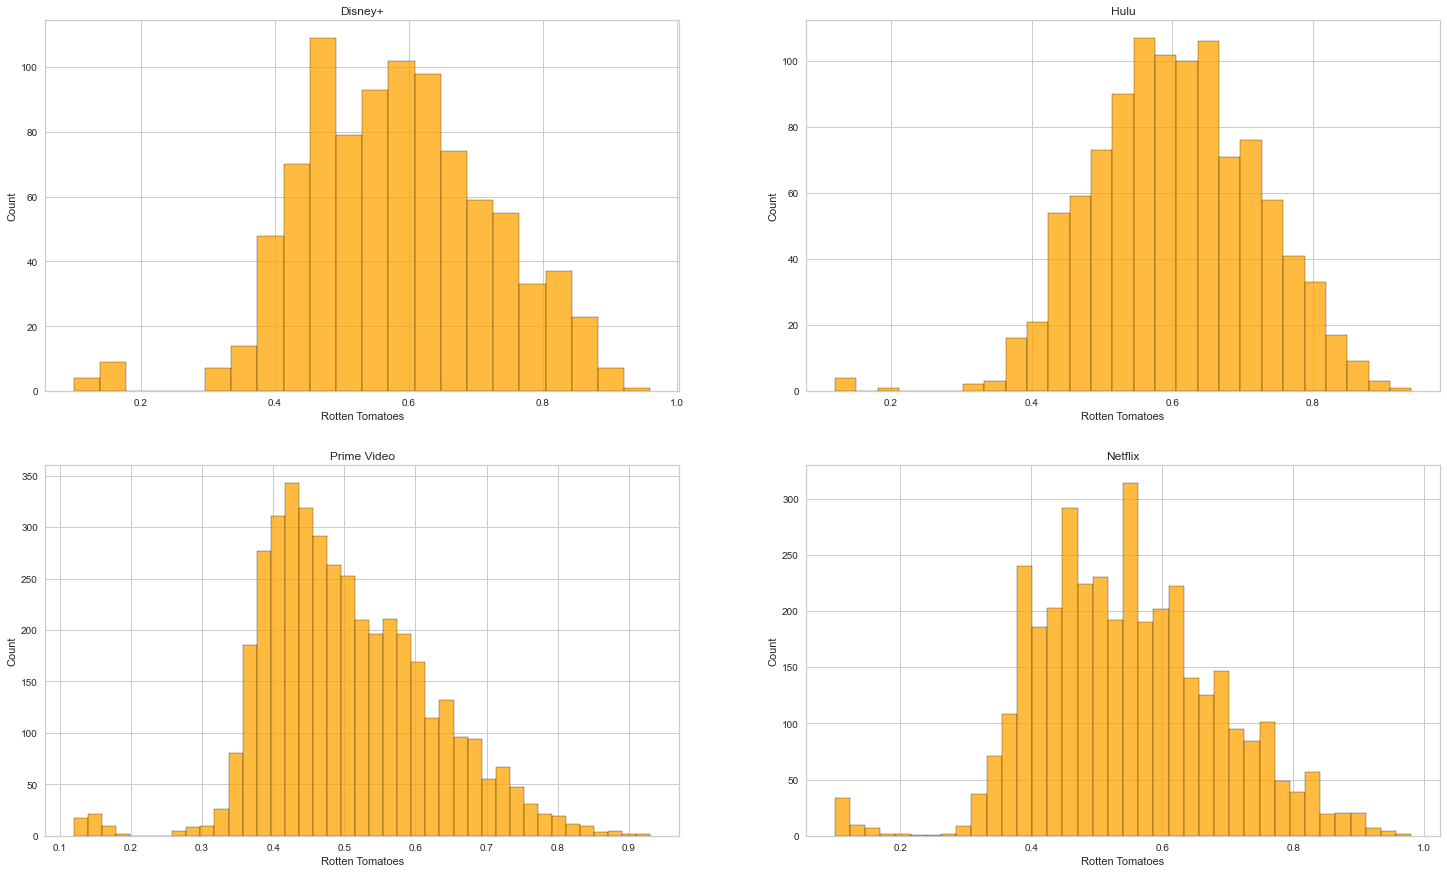

In [17]:
#Gràfic de les puntuacions de les pelis segons la plataforma

#Fem els histogrames
fig = plt.figure(figsize=(25,15))
ax1 = fig.add_subplot(2, 2, 1) 
ax1.set_title('Disney+') 
ax2 = fig.add_subplot(2, 2, 2) 
ax2.set_title('Hulu')
ax3 = fig.add_subplot(2, 2, 3)
ax3.set_title('Prime Video')
ax4 = fig.add_subplot(2, 2, 4)
ax4.set_title('Netflix')
sns.histplot(data=dataset_Disney, x='Rotten Tomatoes', color="orange", ax=ax1)
sns.histplot(data=dataset_Hulu, x='Rotten Tomatoes', color="orange", ax=ax2)
sns.histplot(data=dataset_Prime, x='Rotten Tomatoes', color="orange", ax=ax3)
sns.histplot(data=dataset_Netflix, x='Rotten Tomatoes', color="orange", ax=ax4)
plt.show()

Dinsey+: 0.5831236442516261 Hulu: 0.6039732569245457 Prime Video: 0.5039873571602426 Netflix 0.5444793926247375


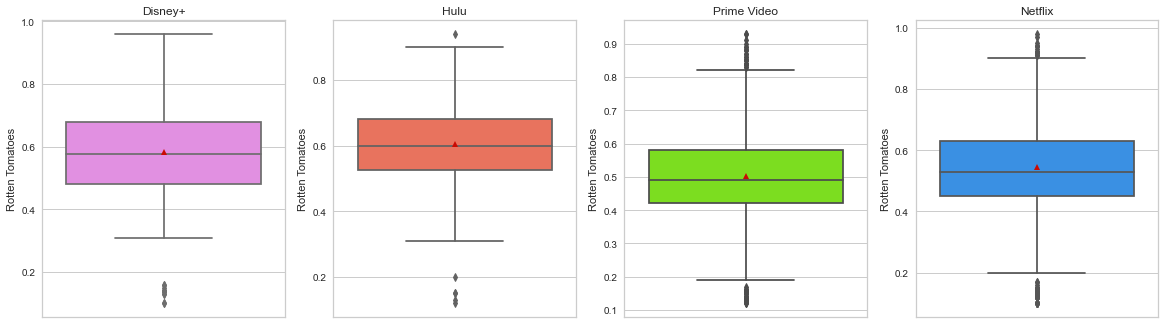

In [18]:
#Més concretament, boxplot mitjana de puntuació de cada plataforma
print("Dinsey+:", dataset_Disney['Rotten Tomatoes'].mean(), "Hulu:", dataset_Hulu['Rotten Tomatoes'].mean(),
     "Prime Video:", dataset_Prime['Rotten Tomatoes'].mean(), "Netflix", dataset_Netflix['Rotten Tomatoes'].mean())
#Fem els histogrames
fig = plt.figure(figsize=(20,12))
ax1 = fig.add_subplot(2, 4, 1) 
ax1.set_title('Disney+') 
ax2 = fig.add_subplot(2, 4, 2) 
ax2.set_title('Hulu')
ax3 = fig.add_subplot(2, 4, 3)
ax3.set_title('Prime Video')
ax4 = fig.add_subplot(2, 4, 4)
ax4.set_title('Netflix')
sns.boxplot(data=dataset_Disney, y="Rotten Tomatoes", color="violet", showmeans = True, ax=ax1)
sns.boxplot(data=dataset_Hulu, y="Rotten Tomatoes", color = "tomato", showmeans = True, ax=ax2)
sns.boxplot(data=dataset_Prime, y="Rotten Tomatoes", color="lawngreen", showmeans = True, ax=ax3)
sns.boxplot(data=dataset_Netflix, y="Rotten Tomatoes", color="dodgerblue", showmeans = True, ax=ax4)
plt.show()

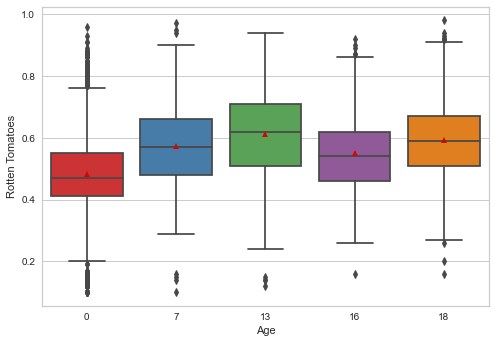

In [19]:
#Ara fem un gràfic de les puntuacions de les pelis segons el grup d'edat al que estan destinades

bp = sns.boxplot(data=dataset_df, x="Age", y="Rotten Tomatoes", palette="Set1", showmeans=True)
plt.show()

In [20]:
#S'agafen tots els atributs que no siguin object
NoObj_data = dataset_df[dataset_df.select_dtypes(exclude=['object']).columns]

# Agafem la intersecció entre el dataset_df i el dataset sense atributs objecte per tractar els outliers posteriorment
intersect = list(set(dataset_df.columns).intersection(list(NoObj_data.columns)))
NoObj_data = dataset_df[intersect]
# NoObj_data.describe()

['Title_Length' 'Prime Video' 'Hulu' 'Age_Restricted' 'Age' 'Disney+'
 'Netflix' 'Year']


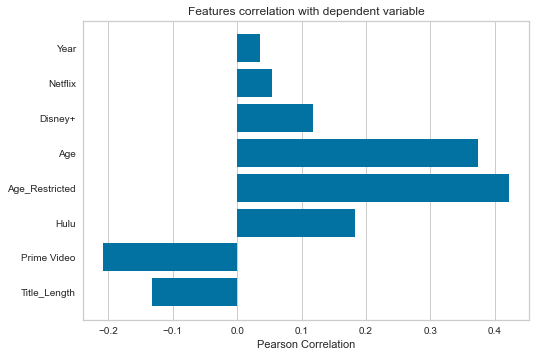

In [21]:
# Correlacio dels atributs amb la variable objectiu (només dels atributs numèrics)
X = NoObj_data.drop(['Rotten Tomatoes'], axis=1)
print(X.columns.values)
Y = NoObj_data['Rotten Tomatoes']
feature_names = list(X.columns)
visualizer = FeatureCorrelation(labels = feature_names)
visualizer.fit(X, Y)
visualizer.poof()

### Estudi dels Outliers

In [22]:
#Ara que ja tenim X i Y separades, Normalitzem les dades
scaler = StandardScaler()
X_scale = pd.DataFrame(scaler.fit_transform(X))
X_cols = X.columns
X_scale.columns = X_cols

In [23]:
#Estudi dels outliers

MiceImputed = NoObj_data.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(NoObj_data)

# Detecting outliers with IQR
Q1 = MiceImputed.quantile(0.05)
Q3 = MiceImputed.quantile(0.95)
IQR = Q3 - Q1
total_outlier_num = ((NoObj_data < (Q1 - 1.5 * IQR)) | (NoObj_data > (Q3 + 1.5 * IQR))).sum()
print(total_outlier_num)

# Removing outliers from the dataset
dataset_df = dataset_df[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
dataset_df.info()

#El dataset només té 2 outliers, per tant, els eliminem

Title_Length       2
Prime Video        0
Hulu               0
Age_Restricted     0
Rotten Tomatoes    0
Age                0
Disney+            0
Netflix            0
Year               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9506 entries, 0 to 9514
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            9506 non-null   object 
 1   Year             9506 non-null   int64  
 2   Age              9506 non-null   int64  
 3   Rotten Tomatoes  9506 non-null   float64
 4   Netflix          9506 non-null   int64  
 5   Hulu             9506 non-null   int64  
 6   Prime Video      9506 non-null   int64  
 7   Disney+          9506 non-null   int64  
 8   Age_Restricted   9506 non-null   int32  
 9   Title_Length     9506 non-null   int64  
dtypes: float64(1), int32(1), int64(7), object(1)
memory usage: 779.8+ KB


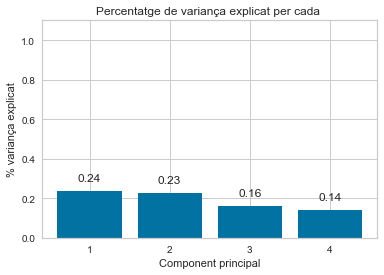

In [24]:
#Igualment, es fa un pca per visualitzar els outliers
model = PCA(n_components=4)
model.fit(X_scale)
data_pca = pd.DataFrame(
    data = model.components_,
    columns = X.columns,
    index = ['PC1','PC2','PC3','PCA4'])
X_pca = model.transform(X_scale)

# Percentatge de variança de cada component
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(model.n_components_) + 1,
    height = model.explained_variance_ratio_
)

for x, y in zip(np.arange(len(data_pca.columns)) + 1, model.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(model.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Percentatge de variança explicat per cada ')
ax.set_xlabel('Component principal')
ax.set_ylabel('% variança explicat');

#Conclusió: com les variances són molt baixes, no val la pena fer un PCA.

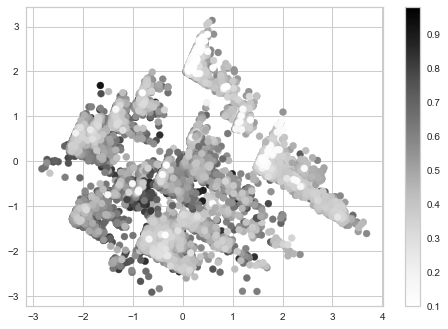

In [25]:
plt.scatter(X_pca[:,0],X_pca[:,1],c=Y)
plt.colorbar()
plt.show()

### MODEL SELECTION

In [26]:
#separem en train i test
x_train,x_test,y_train,y_test = train_test_split(X_scale,Y,test_size=0.3, random_state = 0)

In [27]:
#MODELS:

#Regressió múltiple
def Reg_Mult():
    reg_mult = linear_model.LinearRegression()
    reg_mult.fit(x_train, y_train) #Entrenem el model    
    y_pred_rm = reg_mult.predict(x_test) #Fem la predicció
    y_pred_rm_train = reg_mult.predict(x_train)
    mse = mean_squared_error(y_test, y_pred_rm)
    score_train = reg_mult.score(x_train, y_train)
    score_test = reg_mult.score(x_test, y_test)
    
    return reg_mult, score_test, score_train, mse, y_pred_rm, y_pred_rm_train

#Gradient Boosting
def Grad_Boost():
    reg = GradientBoostingRegressor(n_estimators = 500, max_depth = 4, min_samples_split = 5, learning_rate = 0.01)
    reg.fit(x_train, y_train)
    y_pred_reg = reg.predict(x_test)
    y_pred_reg_train = reg.predict(x_train)
    mse = mean_squared_error(y_test, y_pred_reg)
    score_train = reg.score(x_train, y_train)
    score_test = reg.score(x_test, y_test)
    
    return reg, score_test, score_train, mse, y_pred_reg, y_pred_reg_train


#Random Forest
def Rand_Forest():
    rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 10, random_state = 18)
    rf.fit(x_train, y_train)
    y_pred_rf = rf.predict(x_test)
    y_pred_rf_train = rf.predict(x_train)
    mse = mean_squared_error(y_test, y_pred_rf)
    score_train = rf.score(x_train, y_train)
    score_test = rf.score(x_test, y_test)
    
    return rf, score_test, score_train, mse, y_pred_rf, y_pred_rf_train

In [28]:
#Regressió múltiple
print("REGRESSIÓ MÚLTIPLE")
reg_mult, score_test_rm, score_train_rm, mse_rm, y_pred_rm, y_pred_rm_train= Reg_Mult()
print("Accuracy test:",score_test_rm*100,"%")
print("Accuracy train:",score_train_rm*100,"%")
print("-----------------------------")
print(pd.DataFrame(reg_mult.coef_, x_train.columns, columns=["Coeff"]))
print("-----------------------------")

#Gradient Boosting
print("GRADIENT BOOSTING")
reg, score_test_gb, score_train_gb, mse_gb, y_pred_reg, y_pred_reg_train = Grad_Boost()
print("Accuracy test:",score_test_gb*100,"%")
print("Accuracy train:",score_train_gb*100,"%")

#Random Forest
print("RANDOM FOREST")
rf, score_test_rf, score_train_rf, mse_rf, y_pred_rf, y_pred_rf_train = Rand_Forest()
print("Accuracy test:",score_test_rf*100,"%")
print("Accuracy train:",score_train_rf*100,"%")

REGRESSIÓ MÚLTIPLE
Accuracy test: 28.009226837152525 %
Accuracy train: 23.720672212991733 %
-----------------------------
                   Coeff
Title_Length   -0.012080
Prime Video     0.006448
Hulu            0.029098
Age_Restricted  0.031941
Age             0.022351
Disney+         0.025352
Netflix         0.029962
Year           -0.005106
-----------------------------
GRADIENT BOOSTING
Accuracy test: 31.191344808330346 %
Accuracy train: 31.202735500969137 %
RANDOM FOREST
Accuracy test: 31.929103173497374 %
Accuracy train: 41.5178628904496 %


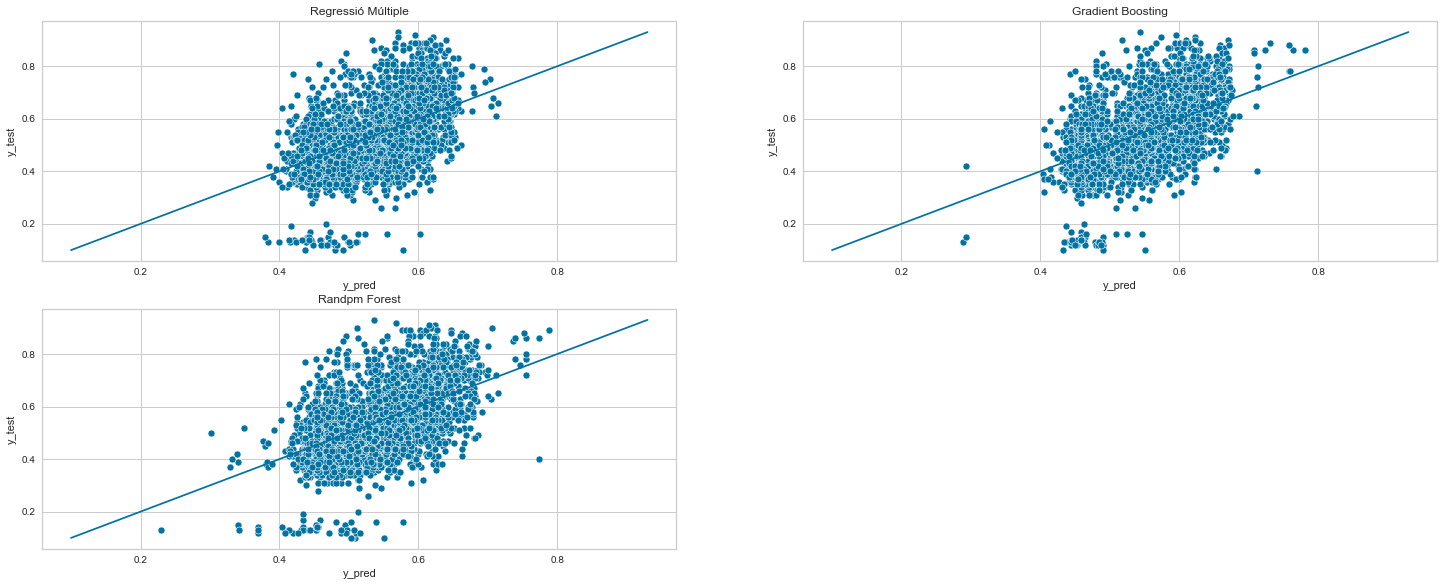

In [29]:
#Ara graficarem la y_test(y) contra la y_pred(x)
fig = plt.figure(figsize=(25,15))
ax1 = fig.add_subplot(3, 2, 1) 
ax1.set_title('Regressió Múltiple') 
ax1.set_xlabel("y_pred") 
ax1.set_ylabel("y_test")
ax2 = fig.add_subplot(3, 2, 2) 
ax2.set_title('Gradient Boosting')
ax2.set_xlabel("y_pred") 
ax2.set_ylabel("y_test")
ax3 = fig.add_subplot(3, 2, 3) 
ax3.set_title('Randpm Forest')
ax3.set_xlabel("y_pred") 
ax3.set_ylabel("y_test")

#Regressió Múltiple
sns.scatterplot(x = y_pred_rm, y = y_test, palette='pastel', ax=ax1)
sns.lineplot(x = y_test, y = y_test, palette = ['r'], ax=ax1) # recta amb pendent 1, per veure com de bona es ypred

#Gradient Boosting
sns.scatterplot(x = y_pred_reg, y = y_test, palette='purple', ax=ax2)
sns.lineplot(x = y_test, y = y_test, palette = 'deep', ax=ax2) # recta amb pendent 1, per veure com de bona es ypred

#Random Forest
sns.scatterplot(x = y_pred_rf, y = y_test, palette='purple', ax=ax3)
sns.lineplot(x = y_test, y = y_test, palette = 'red', ax=ax3) # recta amb pendent 1, per veure com de bona es ypred

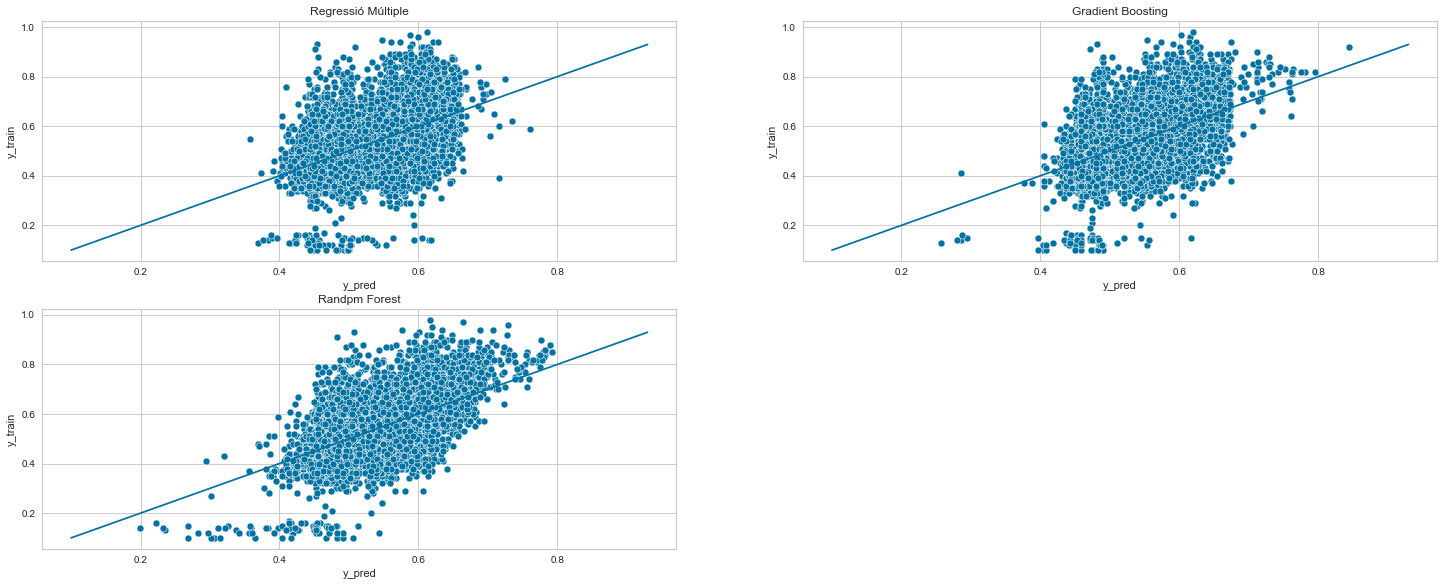

In [30]:
#Ara graficarem la y_train(y) contra la y_pred(x)
fig = plt.figure(figsize=(25,15))
ax1 = fig.add_subplot(3, 2, 1) 
ax1.set_title('Regressió Múltiple') 
ax1.set_xlabel("y_pred") 
ax1.set_ylabel("y_train")
ax2 = fig.add_subplot(3, 2, 2) 
ax2.set_title('Gradient Boosting')
ax2.set_xlabel("y_pred") 
ax2.set_ylabel("y_train")
ax3 = fig.add_subplot(3, 2, 3) 
ax3.set_title('Randpm Forest')
ax3.set_xlabel("y_pred") 
ax3.set_ylabel("y_train")

#Regressió Múltiple
sns.scatterplot(x = y_pred_rm_train, y = y_train, palette='pastel', ax=ax1)
sns.lineplot(x = y_test, y = y_test, palette = ['r'], ax=ax1) # recta amb pendent 1, per veure com de bona es ypred

#Gradient Boosting
sns.scatterplot(x = y_pred_reg_train, y = y_train, palette='purple', ax=ax2)
sns.lineplot(x = y_test, y = y_test, palette = 'deep', ax=ax2) # recta amb pendent 1, per veure com de bona es ypred

#Random Forest
sns.scatterplot(x = y_pred_rf_train, y = y_train, palette='purple', ax=ax3)
sns.lineplot(x = y_test, y = y_test, palette = 'red', ax=ax3) # recta amb pendent 1, per veure com de bona es ypred

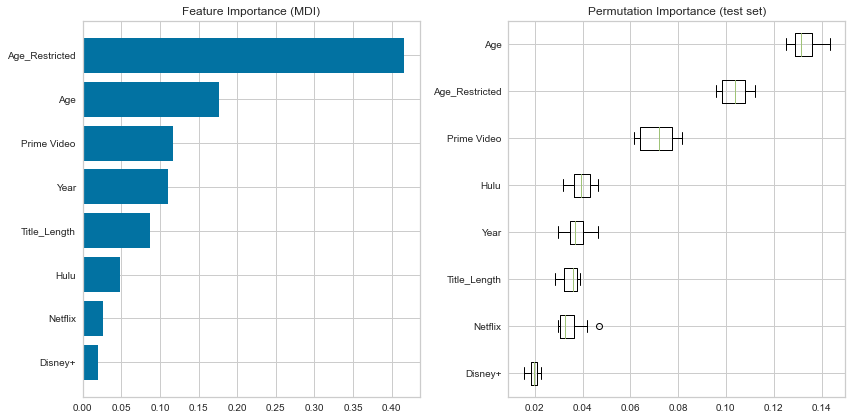

In [31]:
#GRADIENT BOOSTING Plot feature importance
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, X_cols[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, x_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=X_cols[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

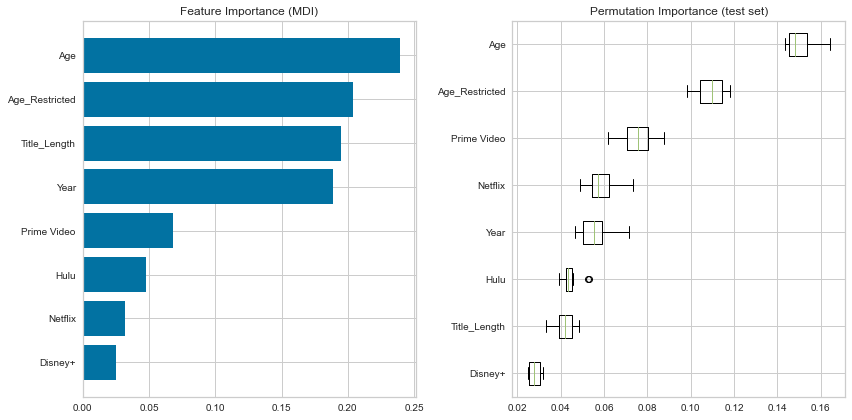

In [32]:
#RANDOM FOREST Plot feature importance
feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, X_cols[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    rf, x_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=X_cols[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

### Anàlisi dels resultats obtinguts

Fem gràfics de les variables que més afecten a predir els models, que són: age, age_restricted, title_length i year.

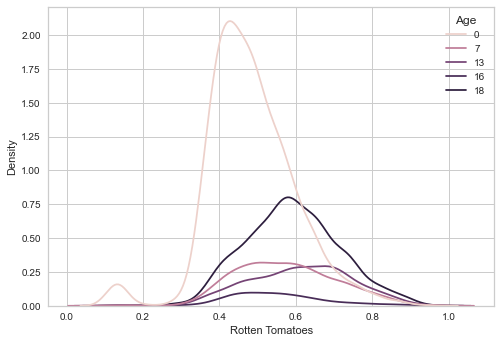

In [33]:
sns.kdeplot(dataset_df, x = 'Rotten Tomatoes', hue = 'Age')

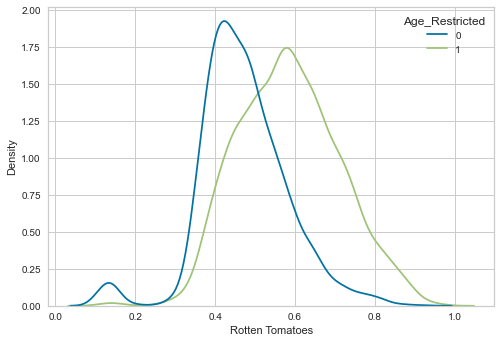

In [34]:
sns.kdeplot(dataset_df, x = 'Rotten Tomatoes', hue = 'Age_Restricted')

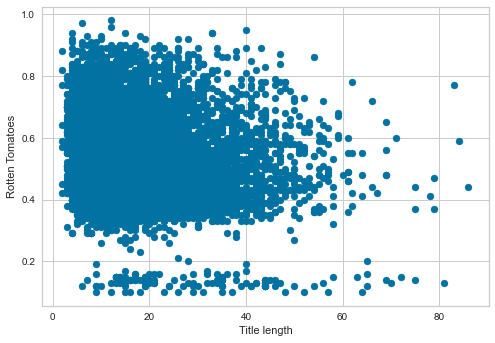

In [35]:
plt.scatter(dataset_df['Title_Length'], dataset_df['Rotten Tomatoes'])
plt.xlabel("Title length") 
plt.ylabel("Rotten Tomatoes")
plt.show()

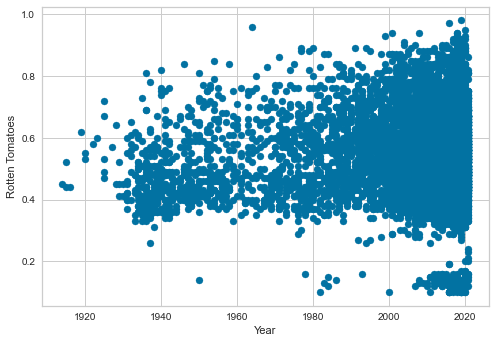

In [36]:
plt.scatter(dataset_df['Year'], dataset_df['Rotten Tomatoes'])
plt.xlabel("Year") 
plt.ylabel("Rotten Tomatoes")
plt.show()

### Millores proposades 

In [37]:
#Afegim una columna amb el número de paraules que conté el títol
dataset_df['Words_Title_aux'] = dataset_df['Title'].str.split(' ')
dataset_df['Words_Title'] = dataset_df['Words_Title_aux'].str.len()
dataset_df = dataset_df.drop(["Words_Title_aux"], axis=1)

#Afegim una altra columna de si el títol conté o no caràcters especials
caracters_especials = [":",",","-","&","!","#"]
for car in caracters_especials:
    dataset_df['contains_'+car] = dataset['Title'].str.contains(car)
    
dataset_df['contains'] = dataset_df['contains_:'] + dataset_df['contains_,'] + dataset_df['contains_-'] + dataset_df['contains_&'] + dataset_df['contains_!'] + dataset_df['contains_#']
dataset_df['Special_character'] = np.where(dataset_df['contains'] == True, 1, 0)
dataset_df = dataset_df.drop(["contains_:", "contains_,", "contains_-", "contains_&", "contains_!", "contains_#", "contains"], axis=1)

dataset_df.head()

,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Age_Restricted,Title_Length,Words_Title,Special_character
0,The Irishman,2019,18,0.98,1,0,0,0,1,12,2,0
1,Dangal,2016,7,0.97,1,0,0,0,1,6,1,0
2,David Attenborough: A Life on Our Planet,2020,7,0.95,1,0,0,0,1,40,7,1
3,Lagaan: Once Upon a Time in India,2001,7,0.94,1,0,0,0,1,33,7,1
4,Roma,2018,18,0.94,1,0,0,0,1,4,1,0


Ara, tornem a entrenar els models amb aquestes dues noves columnes aviam si l'accuracy millora.

In [38]:
#S'agafen tots els atributs que no siguin object
NoObj_data = dataset_df[dataset_df.select_dtypes(exclude=['object']).columns]

# Agafem la intersecció entre el dataset_df i el dataset sense atributs objecte per tractar els outliers posteriorment
intersect = list(set(dataset_df.columns).intersection(list(NoObj_data.columns)))
NoObj_data = dataset_df[intersect]
# NoObj_data.describe()
X = NoObj_data.drop(['Rotten Tomatoes'], axis=1)

Y = dataset_df['Rotten Tomatoes']

#Ara que ja tenim X i Y separades, Normalitzem les dades
scaler = StandardScaler()
X_scale = pd.DataFrame(scaler.fit_transform(X))
X_cols = X.columns
X_scale.columns = X_cols

In [39]:
#separem en train i test
x_train,x_test,y_train,y_test = train_test_split(X_scale,Y,test_size=0.3, random_state = 0)

In [40]:
#Regressió múltiple
print("REGRESSIÓ MÚLTIPLE")
reg_mult, score_test_rm, score_train_rm, mse_rm, y_pred_rm, y_pred_rm_train= Reg_Mult()
print("Accuracy test:",score_test_rm*100,"%")
print("Accuracy train:",score_train_rm*100,"%")
print("-----------------------------")
print(pd.DataFrame(reg_mult.coef_, x_train.columns, columns=["Coeff"]))
print("-----------------------------")

#Gradient Boosting
print("GRADIENT BOOSTING")
reg, score_test_gb, score_train_gb, mse_gb, y_pred_reg, y_pred_reg_train = Grad_Boost()
print("Accuracy test:",score_test_gb*100,"%")
print("Accuracy train:",score_train_gb*100,"%")

#Random Forest
print("RANDOM FOREST")
rf, score_test_rf, score_train_rf, mse_rf, y_pred_rf, y_pred_rf_train = Rand_Forest()
print("Accuracy test:",score_test_rf*100,"%")
print("Accuracy train:",score_train_rf*100,"%")

REGRESSIÓ MÚLTIPLE
Accuracy test: 25.639818325888363 %
Accuracy train: 25.1218785634139 %
-----------------------------
                      Coeff
Title_Length      -0.022580
Prime Video        0.005527
Hulu               0.030102
Age_Restricted     0.033448
Age                0.021884
Disney+            0.026694
Words_Title        0.009920
Special_character -0.000351
Netflix            0.029121
Year              -0.004223
-----------------------------
GRADIENT BOOSTING
Accuracy test: 29.28708774008202 %
Accuracy train: 32.35761607456579 %
RANDOM FOREST
Accuracy test: 30.137057891613782 %
Accuracy train: 43.392088918007346 %


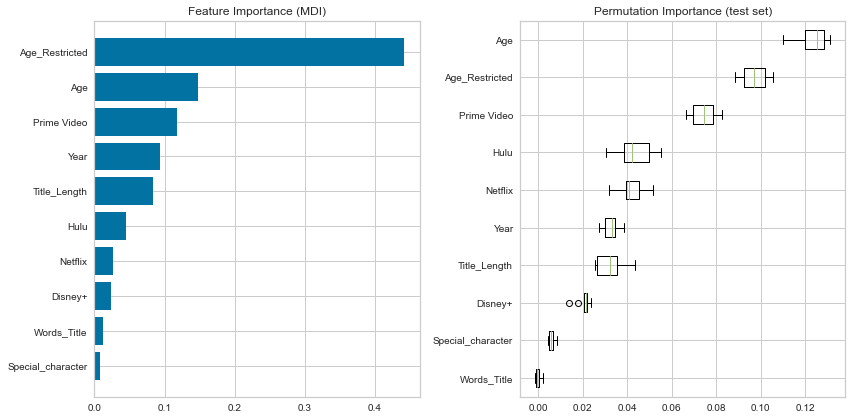

In [41]:
#GRADIENT BOOSTING Plot feature importance
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, X_cols[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, x_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=X_cols[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

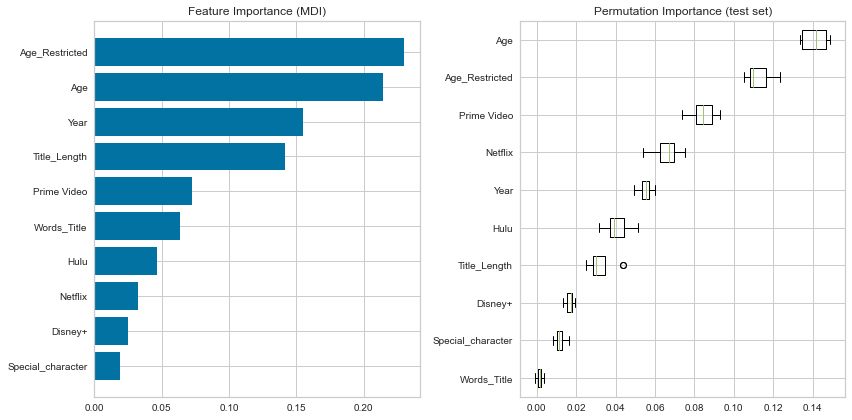

In [42]:
#RANDOM FOREST Plot feature importance
feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, X_cols[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    rf, x_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=X_cols[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

Analitzem una mica les dues noves columnes afegides.

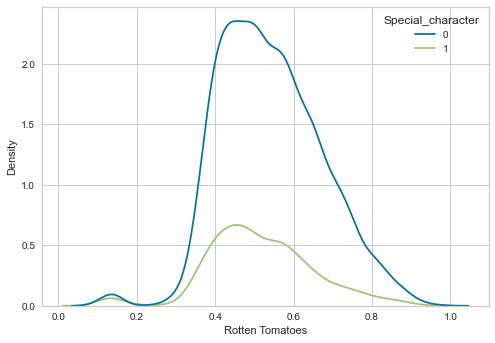

In [43]:
#Es grafica la puntuació respecte si té caràcter especial o no
sns.kdeplot(dataset_df, x = 'Rotten Tomatoes', hue = 'Special_character')

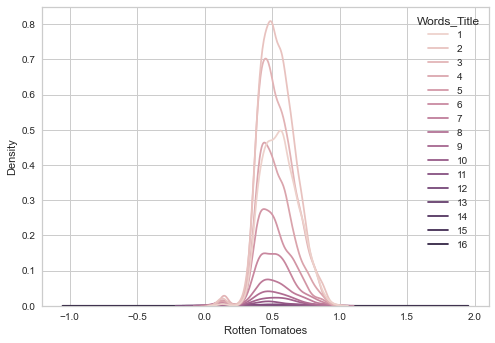

In [44]:
#Es grafica la puntuació segons el nombre de paraules que formen el títol
sns.kdeplot(dataset_df, x = 'Rotten Tomatoes', hue = 'Words_Title')

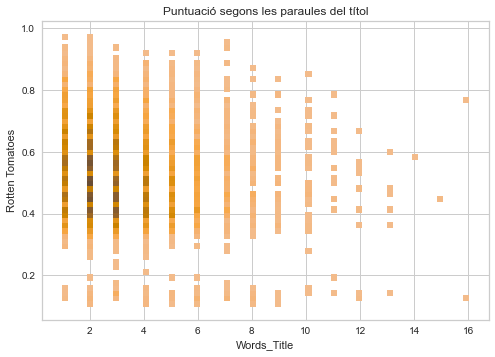

In [45]:
#Analitzant més amb detall aquesta columna

#Gràfic de les puntuacions de les pelis segons la plataforma
sns.histplot(data=dataset_df, x='Words_Title', y='Rotten Tomatoes', color="orange")
plt.title('Puntuació segons les paraules del títol')
plt.show()